# Lecture 5 Homework
Train ResNet34, varying the number of threads and the number of prefetched batches in the data loader. Plot the resulting throughput.

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [53]:
# Retrieve stored HW data
df = pd.read_csv("homework_data.txt")
prefetch = df['prefetch'].sort_values().unique()
threads = df['threads'].sort_values().unique()

mean_df   = pd.pivot(df, index = 'threads', columns='prefetch', values='mean')
stddev_df = pd.pivot(df, index = 'threads', columns='prefetch', values='stddev')

print("Mean Dataframe:\n %s" % mean_df)
print("Stddev Dataframe:\n %s" % stddev_df)

Mean Dataframe:
 prefetch         1         2         3         8         16        32
threads                                                              
1          82.91231  155.8303  154.7188  144.1213  144.7621  124.5765
2         148.70840  258.6340  254.0093  241.3009  228.3696  215.0602
4         226.93710  390.4434  355.2476  321.4568  333.5791  319.4357
8         312.02730  498.7562  450.8718  440.8202  449.9877  418.9852
16        565.61890  576.2717  552.4527  528.8913  496.0907  500.8162
32        697.82060  745.9655  729.1845  685.5575  954.6238  538.0456
64        753.71950  780.7564  814.4206  962.2242  933.4003  626.8901
128       774.94870  812.6455  807.0226  962.6361  799.6568  486.8668
256       859.21250  892.1635  870.5546  906.8394  474.2551  700.7604
Stddev Dataframe:
 prefetch         1          2          3          8          16         32
threads                                                                   
1          10.12815   14.41194   13.91457   

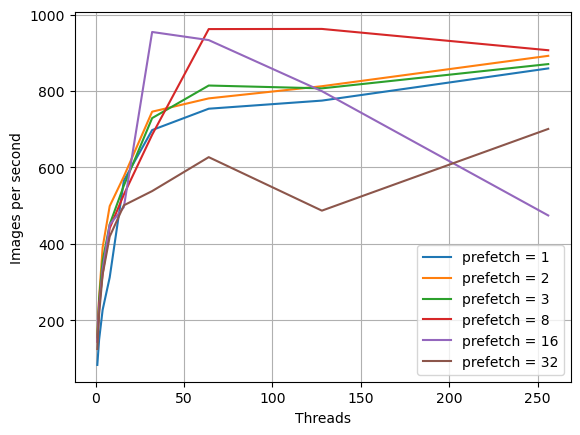

In [63]:
# Plot img / sec vs. threads for different amounts of prefetching
fig, ax = plt.subplots()

for prf in prefetch:
    mean = mean_df[prf]
    ax.plot(threads, mean, label = "prefetch = %d" % (prf))

ax.set_xlabel("Threads")
ax.set_ylabel("Images per second")
ax.legend()
ax.grid()

# Interpretation:
When prefetching 1, 2, or 3 batches the results are similar: increasing the number of threads increases the maximum number of images processed per second, up to a point. Beyond that the throughput saturates at roughly 64 threads / 800 to 900 img per sec, which appears close to the rate at which the GPU can process the loaded data. At this point the cost of data loading is entirely hidden by the GPU computations, so there's no gain in loading the files faster with more CPU threads. Increasing the number of prefetched batches to 8 or 16 leads to slightly better performance with 32, 63, or 128 threads, though prefetching 32 batches appears to slightly decrease performance.

The data for 256 threads is interesting. Since there are only 128 hardware threads, this is invoking some sort of hyperthreading. At this point prefetching 1, 2, 3, and 8 batches performs similarly to before, but prefetching 16 or 32 batches suffers.